<a href="https://colab.research.google.com/github/srilalithaveerubhotla/CMPE_258/blob/master/Ungraded_assignment_1_Fast_AI_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from fastai.vision import *
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
folder = 'black'
file = 'cars.txt'

In [0]:
path = Path('/content/drive/My Drive/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [63]:
path.ls()

[PosixPath('/content/drive/My Drive/Getting started.pdf'),
 PosixPath('/content/drive/My Drive/official_gowri.PNG'),
 PosixPath('/content/drive/My Drive/unofficial_sri.PNG'),
 PosixPath('/content/drive/My Drive/se-programofstudy_gowri.doc'),
 PosixPath('/content/drive/My Drive/se-programofstudy.doc'),
 PosixPath('/content/drive/My Drive/Colab Notebooks'),
 PosixPath('/content/drive/My Drive/twitter_api.zip'),
 PosixPath('/content/drive/My Drive/LSA_PROJECT'),
 PosixPath('/content/drive/My Drive/DM_PROJECT'),
 PosixPath('/content/drive/My Drive/PHOTO-2019-10-31-08-59-29 (2).jpg'),
 PosixPath('/content/drive/My Drive/PHOTO-2019-10-31-08-59-29 (1).jpg'),
 PosixPath('/content/drive/My Drive/PHOTO-2019-10-31-08-59-31 (1).jpg'),
 PosixPath('/content/drive/My Drive/PHOTO-2019-10-31-08-59-29.jpg'),
 PosixPath('/content/drive/My Drive/PHOTO-2019-10-31-08-59-31.jpg'),
 PosixPath('/content/drive/My Drive/PHOTO-2019-10-31-08-59-32.jpg'),
 PosixPath('/content/drive/My Drive/PHOTO-2019-10-31-08-59-3

In [0]:
classes = ['ford','ferari']

In [77]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [78]:
download_images(path/file, dest, max_pics=20, max_workers=0)

In [79]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

ford
ferari


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [81]:
data.classes

['My Drive', 'black', 'personal']

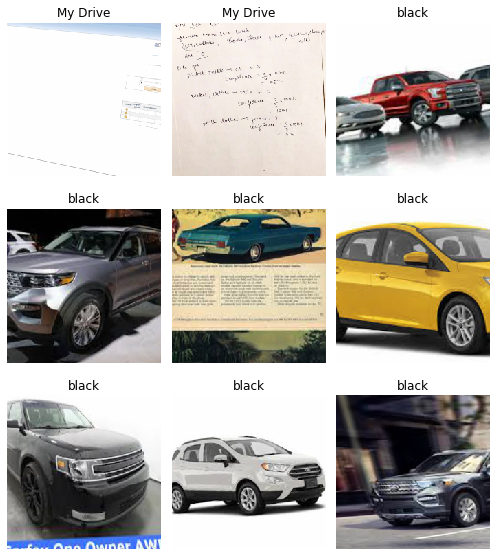

In [82]:
data.show_batch(rows=3, figsize=(7,8))

In [83]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['My Drive', 'black', 'personal'], 3, 156, 38)

In [0]:
cnn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [90]:
cnn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.080922,2.147398,0.842105,00:51
1,1.733074,1.048956,0.447368,00:50
2,1.586337,1.377815,0.657895,00:51
3,1.481113,1.029496,0.500000,00:50


In [0]:
cnn.save('stage-2')

In [0]:
cnn.lr_find()

In [0]:
cnn.recorder.plot()

In [0]:
cnn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [0]:
cnn.save('stage-2')

In [0]:
cnn.load('stage-2');

In [0]:
df = ClassificationInterpretation.from_learner(cnn)

In [0]:
df.plot_confusion_matrix()